### Airbnb Listings for Seattle and Boston 

### Based on the provided data, we would like to answer 3 questions.

##### Context:
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle & Boston.

##### Content:
The following Airbnb activity is included in this Seattle & Boston dataset:
- Seattle_listings: Listings, including full descriptions and average review score
- Boston_listings: Listings, including full descriptions and average review score

##### Questions:
There are 3 questions we would like to answer from our data.<b></b>
- Does pricing matter in deciding Review score ratings?
- How do Seattle and Boston homeowners portray their homes?
- What are the best Airbnb neighborhoods to stay in Seattle and Boston?

#### Import all the libraries

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from nltk.corpus import stopwords
import nltk
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import re

%matplotlib inline

In [237]:
# Uncomment below if you have not download these packages before

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sulella\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sulella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sulella\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### loading the listings data into dataframes

In [238]:
df_seattle = pd.read_csv("C:/Users/sulella/Downloads/Data Scientist/project-1/AIRBNB-Seattle-DATA/Seattle_listings.csv")
df_boston = pd.read_csv("C:/Users/sulella/Downloads/Data Scientist/project-1/AIRBNB-Boston-DATA/Boston_listings.csv")

##### Exploring seattle data

In [239]:
df_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [240]:
df_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [241]:
df_seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


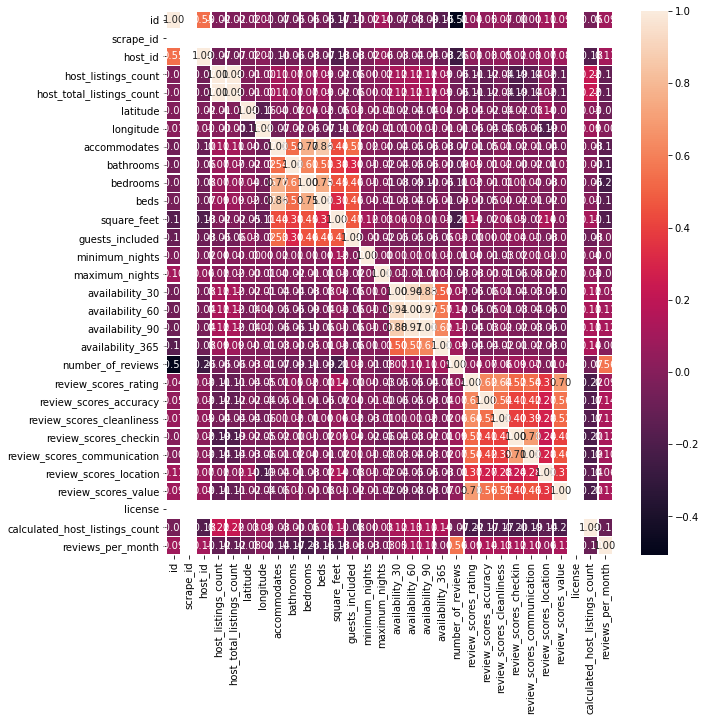

In [242]:
#see correlation in data for Seattle
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df_seattle.corr(), annot=True,linewidth=.5, ax=ax, fmt='.2f');

From the above heat map,we can see the correlation between Accommodates, Bathrooms, Bedrooms, beds, square_feet, guests_included and price. 

##### Exploring Boston Data

In [243]:
df_boston.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [244]:
df_boston.shape

(3585, 95)

In [245]:
df_boston.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [246]:
df_boston.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


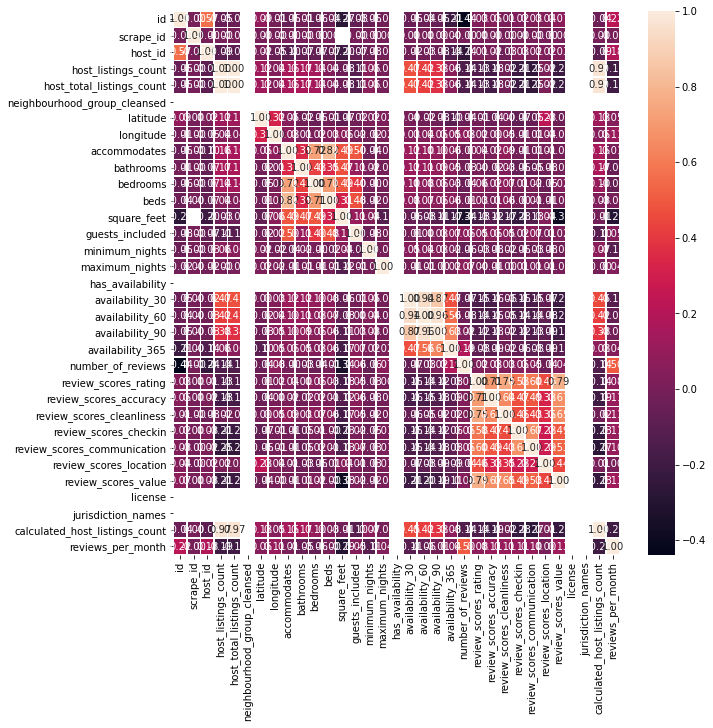

In [247]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df_boston.corr(), annot=True, linewidth=.5, ax=ax, fmt='.2f');

From the above heat map,we can see the correlation between Accommodates, Bathrooms, Bedrooms, beds, square_feet, guests_included and price.

#### Preparing the Data for Further Analysis

We have a lot of columns and many of them are not needed like the listing _url. Let's reduce the df columns to those which we think are relevant.

In [248]:
#make a list of unwanted columns
unwanted_columns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'space', 'description', \
                    'experiences_offered', 'neighborhood_overview', \
                    'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','host_location', 'host_about', 'host_thumbnail_url', \
                    'host_picture_url', 'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified', \
                    'street', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'weekly_price', 'monthly_price',\
                    'calendar_updated', 'has_availability', 'host_total_listings_count',
       'availability_30', 'availability_60', 'availability_90', 'host_verifications',
       'availability_365', 'calendar_last_scraped', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'first_review', 'last_review',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count']

We have removed all columns which we think do not add any value for the purpose of our 3 questions we set out to answer. For the review scores, we choose to use the overall rating score and remove all the individual parameters.

In [249]:
#create a function to remove the columns mentioned above
def drop_unwanted_columns_df(df):
    ''' 
    Input - A dataframe having all columns which are part of the list "unwanted_columns"
    Output - A dataframe having all the columns in the list "unwanted_columns" dropped.
    '''
    df = df.drop(labels = unwanted_columns, axis =1)
    return df

#### Data Preparation for Question 1

For our first question, we will deal with the "price" and "review_scores_rating" columns. As seen in the exploration phase, "price" is not a numeric value in the dataframe and we will need to convert it into one after taking care of other usual characters in a currency field like the "$" sign and ",".


#### Dropping NAs:
We will also drop any rows that does not have a value for the above two fields as it will make our data analysis eaiser. Please note that we could instead use the mean, median, or the most frequently used vlaue for the analysis. As our dataset is relatively small, I did not want to use the above approach of replacing the NANs with any other value. While removing the rows might make our dataset even smaller, it will retain the actual values, and there will be no influence of any sort.


In [250]:
#create a function to clean the price and make it usable to answer our question
def clean_price(df):
    ''' 
    Input - A dataframe which has a column named "price"
    Output - Input dataframe with a cleaned "price" column.
    Cleaning includes removing the "$" sign at the beginnning, and any "," in the value.
    It will then convert the value to a numeric format.
    Finally it will drop any rows in the dataframe which has NAN/NULL values in the "price" column.
    '''
    df['price']=df['price'].apply(lambda x: x.strip("$|,"))
    df['price']=df['price'].apply(lambda x: x.replace(',',""))
    #convert price from string to numeric values
    df['price'] = pd.to_numeric(df['price'])
    df.dropna(subset=['price'], inplace=True)
    return df

In [251]:
def clean_review_ratings(df):
    '''
    Input - A dataframe which has a column named "price"
    Output - Input dataframe with a cleaned "review_scores_rating" column.
    It drops any rows in the dataframe which has NAN/NULL values in the "review_scores_rating" column.
    '''
    df.dropna(subset=['review_scores_rating'], inplace=True)
    return df

In [252]:

df_seattle = drop_unwanted_columns_df(df_seattle)
df_seattle = clean_price(df_seattle)
df_seattle = clean_review_ratings(df_seattle)

df_seattle.shape

(3171, 33)

In [253]:
df_seattle.columns

Index(['summary', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'requires_license', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

In [254]:

df_boston = drop_unwanted_columns_df(df_boston)
df_boston = clean_price(df_boston)
df_boston = clean_review_ratings(df_boston)

df_boston.head(2)

,summary,access,interaction,house_rules,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,reviews_per_month
1,Charming and quiet room in a second floor 1910...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2012-06-07,within an hour,100%,100%,f,1,...,0,$0.00,2,15,36,94.0,f,t,moderate,1.30
2,"Come stay with a friendly, middle-aged guy in ...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",2009-05-11,within a few hours,100%,88%,t,1,...,1,$20.00,3,45,41,98.0,f,f,moderate,0.47


#### Data preparation for question 2

As we look to see how the owners write the summaries for their houses, we will need to ensure that the summary column is prepared and ready.


In [255]:

#clean Summary column in both datasets
df_seattle.dropna(subset=['summary'], inplace=True)
df_boston.dropna(subset=['summary'], inplace=True)

In [256]:

#save cleaned Seattle and Boston files
df_seattle.to_csv('Seattle_cleaned.csv')
df_boston.to_csv('Boston_cleaned.csv')

In [257]:

#load cleaned Seattle and Boston CSVs
df_seattle = pd.read_csv('Seattle_cleaned.csv')
df_boston = pd.read_csv('Boston_cleaned.csv')

#### Data Analysis Question 1:

Does price have an impact on the review scores? Let's check both the fields and see if we have to do any data wrangling.


In [258]:
df_seattle[['price','review_scores_rating']].describe()

,price,review_scores_rating
count,3004.000000,3004.000000
mean,126.787949,94.590213
std,90.405893,6.656166
min,22.000000,20.000000
25%,75.000000,93.000000
50%,100.000000,96.000000
75%,150.000000,100.000000
max,1000.000000,100.000000


##### Price vs Review Ratings: Scatter Plots for Seattle & Boston

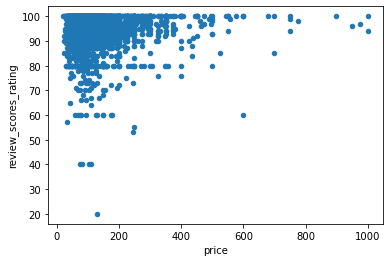

In [259]:

#scatter plot for price vs Review Ratings for Seattle
df_seattle.plot.scatter('price','review_scores_rating');

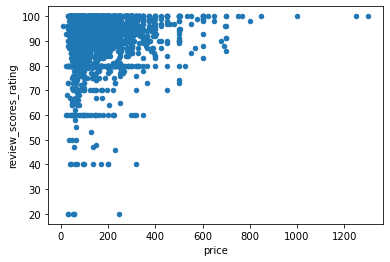

In [260]:

#scatter plot for price vs Review Ratings for Boston
df_boston.plot.scatter('price','review_scores_rating');

In [261]:
df_boston[['price','review_scores_rating']].describe()


,price,review_scores_rating
count,2644.000000,2644.000000
mean,164.209153,91.983359
std,112.236668,9.642126
min,11.000000,20.000000
25%,84.000000,89.000000
50%,144.000000,95.000000
75%,207.250000,99.000000
max,1300.000000,100.000000


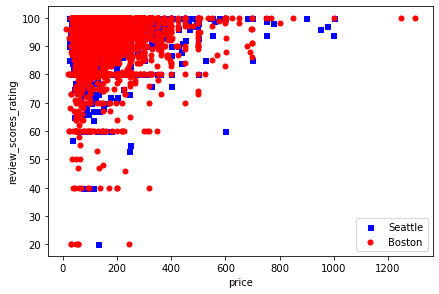

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [321]:

#combine scatter plots of Seattle and Boston
plt.scatter(df_seattle['price'], df_seattle['review_scores_rating'], s=25, c='b', marker="s", label='Seattle')
plt.scatter(df_boston['price'], df_boston['review_scores_rating'], s=25, c='r', marker="o", label='Boston')
plt.tight_layout();
plt.legend(loc='lower right');
plt.xlabel('price')
plt.ylabel('review_scores_rating')
plt.show()
plt.figure(figsize=(10,5))

#### Results Discussion Q1

It is clear from the above graph that there is no difference in the dynamics of pricing vs reviews in Seattle and Bosotn. They follow a similar pattern in both the cities. The pattern however by itself is interesting. As the price goes up, the number of overall ratings come down which is as expected as the total number of people staying will also come down. And the average rating goes up as the price goes up, which again can be attributed to better services, and facilities being available at higher price points.


#### Question 2:

How do Seattle and Boston homeowners describe their houses? Is there a difference in the way top reviewed houses are described?


In [316]:
#build word cloud function
def build_word_cloud(df_column):
    '''
    input - A dataframe column with categorical words in it
    output - A wordcloud of the top words used in it. 
    It excludes obvious words we do not want to see in the word cloud along 
    with the standard STOPWORDS in the wordcloud module
    '''
    stopwords = set(STOPWORDS)
    stopwords.update(["seattle", "boston", "room", "this", "close", "to", "walk", "my"])
    #stopwords = ["seattle", "Boston","room"] + list(STOPWORDS)
     
    wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(df_column))
    #display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

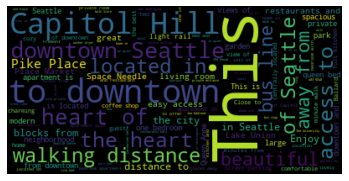

In [292]:

#Seattle listing summary word cloud:
build_word_cloud(df_seattle['summary'])



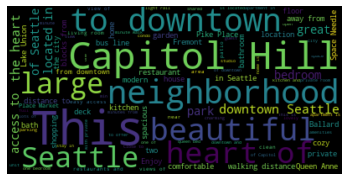

In [293]:
#Seattle word cloud for top 25%ile listings
build_word_cloud(df_seattle.summary[df_seattle.review_scores_rating>99])

#### Results Discussion Q2: Seattle Word Cloud discussion

At an aggregate level for overall listings within Seattle, the summaries seem to have the following words at a higher frequency: beautiful, comfortable, private home, being near downtown, things being available at walking distance. Capitol Hill area also seems to be very popular.

When you compare it against the top 25 percentile homes in Seattle (75th percentile for review ratings in Seattle is 99), majority of the words are similar. However, there are few interesting words which had higher frequency amongst those with high ratings. These are neighborhood, kitchen, large, and downtown.

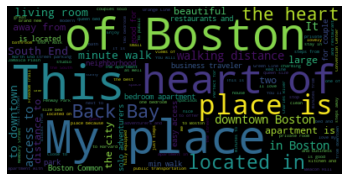

In [314]:
#Boston Listing summary word cloud:
build_word_cloud(df_boston['summary'])

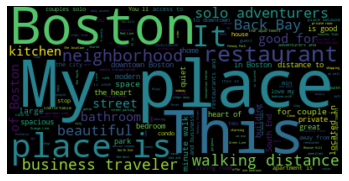

In [315]:
#Boston word cloud for top 25%ile listings
build_word_cloud(df_boston.summary[df_boston.review_scores_rating>99])

#### Results Discussion Q2: Boston Word Cloud discussion

At an aggregate level for overall listings within Boston, the summaries seem to have the following words at a higher frequency: downtown, Back bay location, beautiful, park, South end, private home, and park.

When you compare it against the top 25 percentile homes in Boston (75th percentile for review ratings in Boston is 98), majority of the words are similar. However, there are few interesting words which had higher frequency amongst those with high ratings. These are neighbourhood, located, being near restaurant, and close. Being close to happening places, seem to be the major driver behind getting higher ratings in Boston as per the word cloud.



#### Question 3

What are the best neighbourhoods to stay in Seattle and Boston?


In [268]:
def get_best_neighbourhoods(df, min_listings, top_x):
    
    '''
    Inputs: 
    1. df = A dataframe with columns named "neighbourhood_cleansed", and "review_scores_rating"
    2. min_listings = minimum number of listings needed in neighbourhoods
    3. top_x = show top x results in output
    Output - A dataframe with 3 columns - Best neighbourhoods, their average review scores, and the number of listings 
    in these neighborhoods
    '''
    
    #Get mean review ratings by neighbourhood
    df_q3a = df.groupby('neighbourhood_cleansed', as_index=False)['review_scores_rating'].mean().\
    sort_values('review_scores_rating', ascending=False)
    
    #Get count of listings by neighbourhood
    df_q3b=df.neighbourhood_cleansed.value_counts().rename_axis('neighbourhood_cleansed').reset_index(name='counts')
    
    # Merge both averages of review ratings and number of listings into one table
    df_q3 = pd.merge(df_q3a, df_q3b, on='neighbourhood_cleansed')
    
    #get neighbourhoods ratings, and number of listings available
    return df_q3[df_q3['counts']>=min_listings].head(top_x)

In [269]:
#Top 10 neighbourhoods in Seattle with at least 10 listings
df_seattle_q3 = get_best_neighbourhoods(df_seattle,10,10)
df_seattle_q3

,neighbourhood_cleansed,review_scores_rating,counts
1,Madrona,97.538462,39
3,Southeast Magnolia,97.214286,14
4,Harrison/Denny-Blaine,97.200000,10
5,Genesee,96.933333,30
6,North Beach/Blue Ridge,96.909091,11
8,North Delridge,96.666667,24
9,Whittier Heights,96.571429,21
10,North College Park,96.428571,14
11,Minor,96.270492,122
12,Broadview,96.266667,15


In [270]:
#Top 10 neighbourhoods in Boston with at least 10 listings
df_boston_q3 = get_best_neighbourhoods(df_boston,10,10)
df_boston_q3

,neighbourhood_cleansed,review_scores_rating,counts
1,Roslindale,95.489362,47
2,West Roxbury,95.156250,32
3,South Boston Waterfront,94.431034,58
4,Jamaica Plain,94.266667,285
5,South Boston,94.026490,151
7,Charlestown,93.731343,67
8,North End,93.687500,112
9,South End,93.478261,253
10,Beacon Hill,93.427711,166
11,Bay Village,93.000000,16


In [271]:
#create plot function
def build_plot_best_neighbourhoods(df):
    '''
    Input - A dataframe with columns named "neighbourhood_cleansed", "review_scores_rating", and "counts"
    Output -  A bar plot and line plot in one. Neighborhood is on the common X-axis and 
    the "counts" and "review_scores_rating" are on the Y-axis for the bar plot and the line plot respectively.
    '''
    fig, ax = plt.subplots(figsize= (20,8))
    ax1 = ax.twinx()
    sns.barplot(ax=ax, x=df['neighbourhood_cleansed'], y=df['counts']);
    sns.lineplot(ax=ax1,x=df['neighbourhood_cleansed'], y=df['review_scores_rating']);

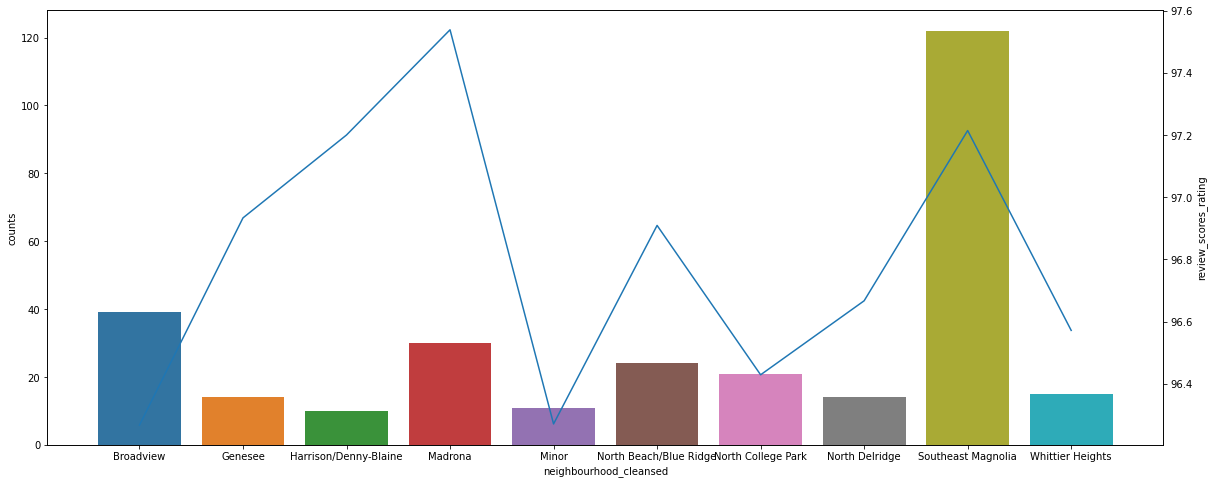

In [272]:
#Seattle best neighbourhoods plot
build_plot_best_neighbourhoods(df_seattle_q3)

We can clearly see that in Seattle, amongst the nieghbourhoods with at least 10 listings, Southeast Magnolia has a lot more listings (bar plot) than any other neighbourhood with the 2nd best review rating scores (line plot).


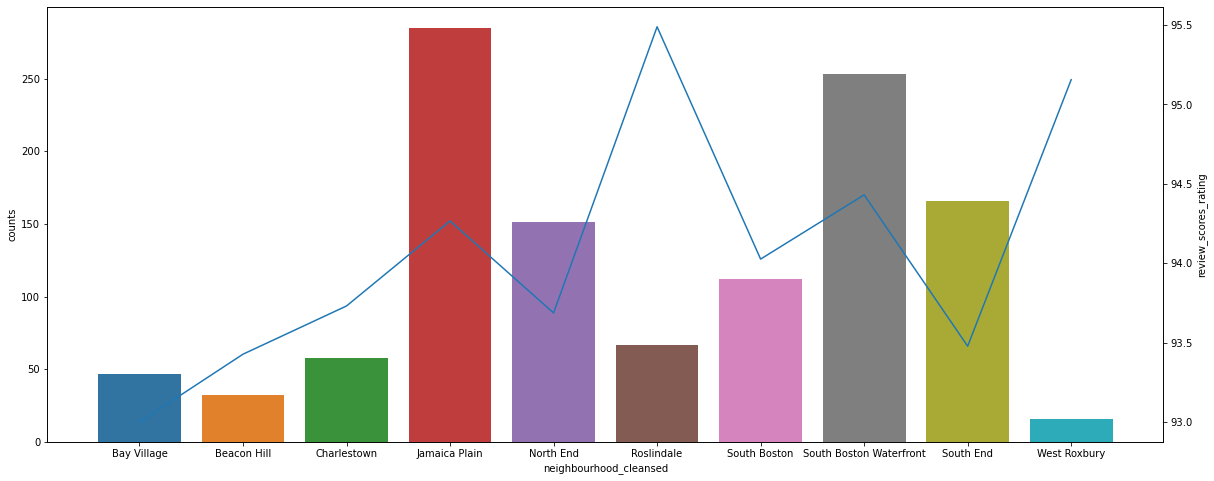

In [273]:
#Boston best neighbourhoods plot
build_plot_best_neighbourhoods(df_boston_q3)

Unlike Seattle, in Boston, amongst the nieghbourhoods with at least 10 listings, there is no clear one neighbourhood but rather few choices depending on what one wants. The balanced choices are between Jamaica Plain and South Boston Waterfront which have relatively high number of listings and high review ratings. However if one wants to go purely by highest review rating scores, then he/she has to look at Roslindale and West Roxbury neighbourhoods.
